In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import cache
import utils
wandb_api = wandb.Api()
%config InlineBackend.figure_format='retina'

In [2]:
@cache
def get_run_loss(run_name=None, run_id=None):
    filters = {'display_name': run_name} if run_id is None else {'name': run_id}
    runs = wandb_api.runs(path=f'martin-nyu/picodo-bs', filters=filters)
    _ = len(runs) # without this line, wandb doesn't load the run on the first try, unclear why
    run = runs[-1]
    df = run.history(keys=['train_loss', 'train_tokens_seen'])
    x = df['train_tokens_seen']
    y = df['train_loss']
    return x, y

@cache
def get_sweep_loss(sweep_name):
    sweep = utils.load_sweeps([sweep_name])
    run_id = sweep.loc[sweep['eval_loss'].idxmin(), 'id']
    return get_run_loss(run_id=run_id)

len(sweeps)=1
len(sweeps)=1
len(sweeps)=1
len(sweeps)=1
len(sweeps)=1


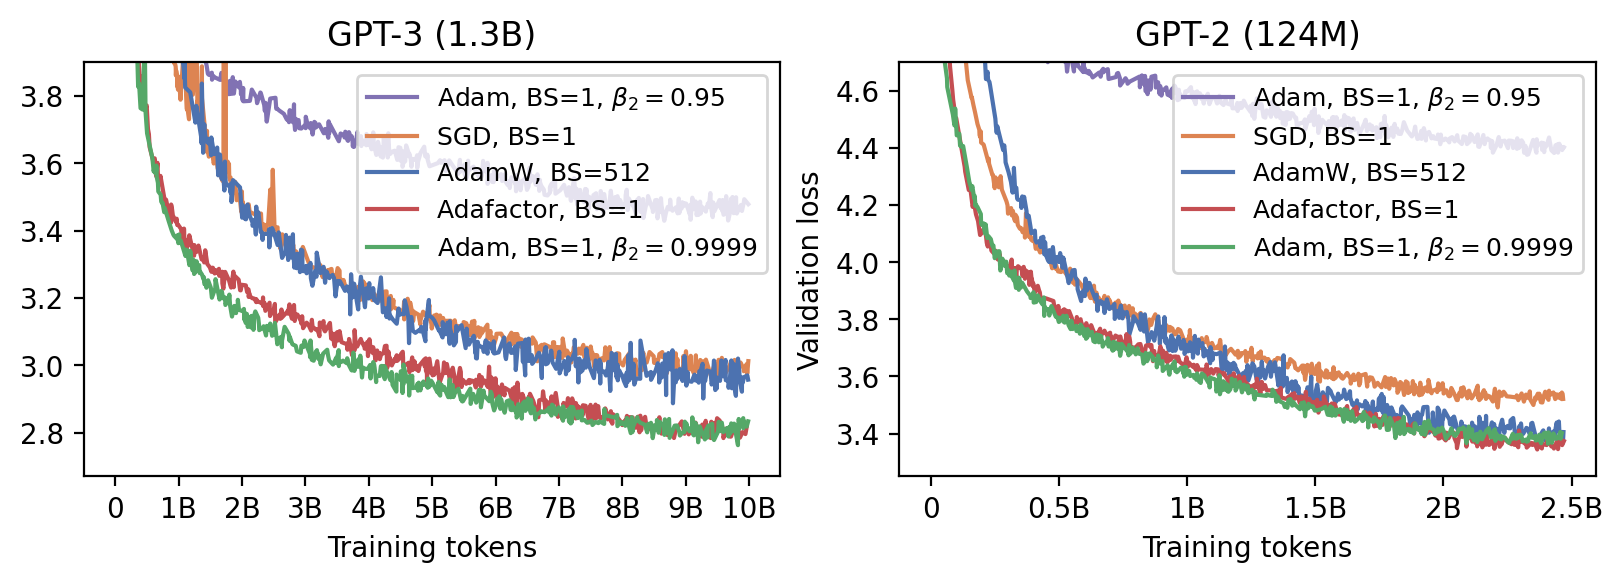

In [3]:
# key, label, color
to_plot = (
    ( # gpt3
        ('gpt3xl_adam_b2_2', r'Adam, BS=1, ${\beta_2}=0.95$', 4),
        ('gpt3xl_sgd_2', r'SGD, BS=1', 1),
        ('gpt3xl_oai_2', r'AdamW, BS=512', 0),
        ('gpt3xl_adafactor_2_0032', r'Adafactor, BS=1', 3),
        ('gpt3xl_adam_t2_2', r'Adam, BS=1, ${\beta_2}=0.9999$', 2),
    ),
    ( # gpt2
        ('gpt2s_adam_bs1_b2_v3_1', r'Adam, BS=1, ${\beta_2}=0.95$', 4),
        ('gpt2s_sgd_bs1_v3_1', r'SGD, BS=1', 1),
        ('gpt2s_adam_bs512_v3_1', r'AdamW, BS=512', 0),
        ('gpt2s_adafactor_bs1_v3_1', r'Adafactor, BS=1', 3),
        ('gpt2s_adam_bs1_t2_v3_1', r'Adam, BS=1, ${\beta_2}=0.9999$', 2),
    ),
)
    
fig, axs = plt.subplots(1, 2, figsize=(8, 2.8), layout='constrained')
colors = olors = sns.color_palette('deep')
for i, (ax, models) in enumerate(zip(axs, to_plot)):
    for key, label, color_idx in models:
        get_loss = get_sweep_loss if 'gpt2s' in key else get_run_loss
        x, y = get_loss(key)
        ax.plot(x, y, '-', label=label, color=colors[color_idx])

axs[0].set_xticks(*zip(*[(i*10**9, f'{i}{"B" if i>0 else ""}') for i in range(11)]))
axs[0].set_yticks(t := [2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0], t)
axs[0].set_ylim([2.67, 3.9])
axs[0].legend(fontsize=9)
axs[0].set_xlabel('Training tokens')
axs[0].set_title('GPT-3 (1.3B)')

axs[1].set_xticks(*zip(*[(i*10**9, f'{i:g}{"B" if i>0 else ""}') for i in np.arange(0, 2.6, 0.5)]))
axs[1].set_yticks(t := [3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6], t)
axs[1].set_ylim([3.25, 4.7])
axs[1].legend(loc='upper right', fontsize=9)
axs[1].set_xlabel('Training tokens')
axs[1].set_ylabel('Validation loss')
axs[1].set_title('GPT-2 (124M)')

# plt.savefig('plots/gpt.pdf')
plt.show()